In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('data/test.csv', header=None)
df.columns=['q1','q2','mid','final']
df

,q1,q2,mid,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [10]:
x_data = df.iloc[:,:-1].values #특성데이터 추출
y_data = df.iloc[:, [-1]].values

In [12]:
x_data.shape

(25, 3)

In [14]:
y_data.shape

(25, 1)

In [15]:
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)

In [16]:
w = tf.Variable( tf.random.uniform( [3,1] ) ) #[특성데이터갯수,라벨의갯수]
b = tf.Variable( tf.random.uniform( [1] ) ) #[라벨의갯수]

In [17]:
def compute_loss():
    hx = tf.matmul( x, w) + b
    cost = tf.reduce_mean( (hx-y)**2)
    return cost

In [18]:
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    print(i, 'cost:', compute_loss().numpy() )

0 cost: 3368.945
1 cost: 1178.8884
2 cost: 149.0247
3 cost: 74.230965
4 cost: 571.9129
5 cost: 1176.9913
6 cost: 1547.4159
7 cost: 1571.6552
8 cost: 1312.3647
9 cost: 905.74615
10 cost: 492.07004
11 cost: 179.17621
12 cost: 24.988136
13 cost: 32.287197
14 cost: 155.84471
15 cost: 322.57825
16 cost: 459.505
17 cost: 518.2032
18 cost: 486.01984
19 cost: 382.50082
20 cost: 246.43051
21 cost: 120.23708
22 cost: 36.59522
23 cost: 10.014921
24 cost: 34.842552
25 cost: 89.76863
26 cost: 147.07404
27 cost: 183.0419
28 cost: 185.54797
29 cost: 156.37634
30 cost: 108.28218
31 cost: 58.77274
32 cost: 23.268606
33 cost: 9.999957
34 cost: 18.100658
35 cost: 39.20332
36 cost: 61.59549
37 cost: 75.09697
38 cost: 74.68311
39 cost: 61.5983
40 cost: 41.887413
41 cost: 23.301435
42 cost: 12.002407
43 cost: 10.368047
44 cost: 16.603317
45 cost: 26.085
46 cost: 33.67487
47 cost: 35.917732
48 cost: 32.21593
49 cost: 24.628345
50 cost: 16.575945
51 cost: 11.163523
52 cost: 9.886979
53 cost: 12.229895
54 cost

494 cost: 6.7277656
495 cost: 6.724579
496 cost: 6.7213955
497 cost: 6.7182336
498 cost: 6.715086
499 cost: 6.711934
500 cost: 6.7088294
501 cost: 6.7057166
502 cost: 6.702611
503 cost: 6.699537
504 cost: 6.696478
505 cost: 6.6934266
506 cost: 6.69039
507 cost: 6.6873693
508 cost: 6.684361
509 cost: 6.6813717
510 cost: 6.6783924
511 cost: 6.67542
512 cost: 6.672475
513 cost: 6.669538
514 cost: 6.6666036
515 cost: 6.6637096
516 cost: 6.660815
517 cost: 6.657924
518 cost: 6.655068
519 cost: 6.6522007
520 cost: 6.6493535
521 cost: 6.6465282
522 cost: 6.643706
523 cost: 6.640912
524 cost: 6.638124
525 cost: 6.6353407
526 cost: 6.6325855
527 cost: 6.6298223
528 cost: 6.627091
529 cost: 6.6243725
530 cost: 6.6216598
531 cost: 6.6189723
532 cost: 6.616275
533 cost: 6.613604
534 cost: 6.6109343
535 cost: 6.608288
536 cost: 6.6056542
537 cost: 6.6030464
538 cost: 6.600431
539 cost: 6.5978336
540 cost: 6.595245
541 cost: 6.592668
542 cost: 6.5901046
543 cost: 6.587553
544 cost: 6.585022
545 cost

983 cost: 6.096167
984 cost: 6.0956936
985 cost: 6.0952363
986 cost: 6.0947547
987 cost: 6.094291
988 cost: 6.093827
989 cost: 6.09336
990 cost: 6.092895
991 cost: 6.092428
992 cost: 6.0919795
993 cost: 6.091518
994 cost: 6.0910554
995 cost: 6.0905895
996 cost: 6.0901313
997 cost: 6.089676
998 cost: 6.0892167
999 cost: 6.0887566


In [23]:
def hxfn( xdata):
    xd = tf.constant( xdata ,tf.float32)
    hx = tf.matmul( xd, w) +b
    return hx.numpy()

In [24]:
# q1:80, q2:90, mid:90 최종점수를 예측하시요
hxfn([[80,90,90]])  # 1x3 3x1

array([[177.43973]], dtype=float32)

In [25]:
hxfn( x_data)

array([[152.86267],
       [184.71344],
       [181.40228],
       [198.85281],
       [140.0187 ],
       [105.27106],
       [150.44083],
       [113.74076],
       [174.4    ],
       [164.43495],
       [143.90797],
       [142.80511],
       [186.12492],
       [152.93097],
       [151.41702],
       [188.57353],
       [144.38239],
       [181.1626 ],
       [177.08575],
       [158.56152],
       [176.12572],
       [174.46333],
       [167.46909],
       [151.11581],
       [190.68677]], dtype=float32)

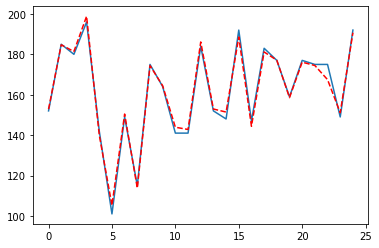

In [28]:
plt.plot( y_data)
plt.plot( hxfn( x_data) ,'r--')
plt.show()

In [19]:
w.numpy()

array([[0.38253182],
       [0.5197683 ],
       [1.1134433 ]], dtype=float32)